In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


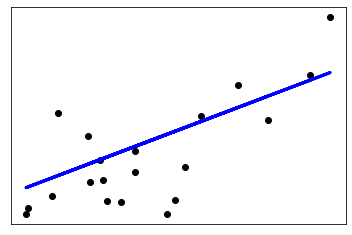

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
# This is the example from the website where they use only one feature

In [3]:
#Now we will try using all the features
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)


LinearRegression()

In [4]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Residual sum of squares" % r2_score(diabetes_y_test, diabetes_y_pred))

# Using the additional variables, we are able to reduce our mean squared error and increase our
# R_squared score, meaning the model is more accurate with all the features

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Residual sum of squares


In [5]:
from sklearn.model_selection import KFold
ix = 0
MSE = []
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(diabetes_X):
    diabetes_X_train, diabetes_X_test = diabetes_X[train_index], diabetes_X[test_index]
    diabetes_y_train, diabetes_y_test = diabetes_y[train_index], diabetes_y[test_index]
    
    regr = linear_model.LinearRegression()
    regr.fit(diabetes_X_train, diabetes_y_train)
    
    diabetes_y_pred = regr.predict(diabetes_X_test)
    ix += 1
    print(f"Coefficients for fold {ix}: {regr.coef_}")
    print(f"Mean squared error for fold {ix}:  {mean_squared_error(diabetes_y_test, diabetes_y_pred)}")
    print(f"Residual sum of squares for fold {ix}:  {r2_score(diabetes_y_test, diabetes_y_pred)}")
    MSE.append(mean_squared_error(diabetes_y_test, diabetes_y_pred))
    
# To perform 10-fold cross validation, we import the Kfold iterator for sklearn and apply it to our 
# diabetes data. For each fold, we perform the regression model and print the coefficients, MSE, and
# R2. We also store the MSE results for our calculations in part d.

Coefficients for fold 1: [  -9.35207221 -231.25935869  522.28500451  322.9065529  -633.34781888
  401.62150256   -8.76480774  115.25791809  650.39226132   88.66074286]
Mean squared error for fold 1:  2533.848109362115
Residual sum of squares for fold 1:  0.5561441117948531
Coefficients for fold 2: [ -21.11846535 -215.88640593  529.35821161  323.83044314 -948.59584272
  607.30739517  162.55714013  189.10624282  803.30840477   86.70881806]
Mean squared error for fold 2:  2870.7677114085445
Residual sum of squares for fold 2:  0.23056091914863142
Coefficients for fold 3: [  44.59538444 -230.20810407  533.18081477  335.16932957 -989.99143477
  602.00982274  239.60713172  279.80132481  820.70907004   25.69869348]
Mean squared error for fold 3:  3512.7235093015265
Residual sum of squares for fold 3:  0.3535777696679423
Coefficients for fold 4: [ -24.3926342  -247.60708344  503.88724153  330.70556115 -509.97724606
  283.36701109  -55.56622118   83.0034667   672.09717696   40.25679542]
Mean sq

In [6]:
# part d
print(f"The range of variance scores is {min(MSE)} - {max(MSE)}")
print(f"The mean of variance scores is {np.mean(MSE)}")
print(f"The std deviation of variance scores is {np.std(MSE)}")

# comparing these results to part b. Our average variance is significantly higher than when we performed
# our model without k-folds. We expect our K fold model to have less bias that the general model, but we 
# have shown that it has more variance


The range of variance scores is 1769.684056567653 - 4122.93998139503
The mean of variance scores is 3000.3810328390514
The std deviation of variance scores is 681.7740593516213


In [7]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# import all the required packages for this tutorial

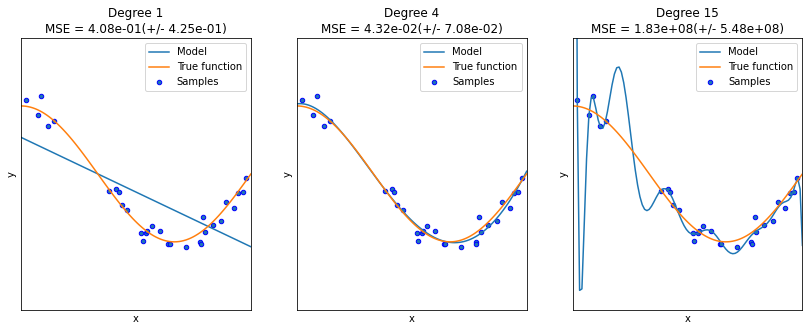

In [8]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# here we create our features and target variables using an np random seed

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)
    
    # we vary the number of degrees in our model fitting, using 1, 4, and 15 in this example
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
    # finally we plot the results and state the MSE for each of our regression models
plt.show()

2 b,c, and d
The first plot in the above example (the one with a polynomial of degree 1) is an example of underfitting. Our model has high variance but low bias. The linear function is not a good estimator of our targets in this case

The third plot is an example of overfitting. We used too many degrees (15) and our model is too heavily weighted on our sample data. This is an example of high bias but low variance.

For this example, it is better to use MSE as we are looking to score on both bias and variance. The R2 value for our 3rd model will sugguest that the model performed very well, but in this case we can see that there is actually high bias

In [9]:
# 2e
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

for i in range(len(degrees)):

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    pipeline = make_pipeline(
    polynomial_features, LassoLarsIC(criterion="aic", normalize=False)
    )
    
    pipeline.fit(X[:, np.newaxis], y)
    # fit the Lasso regression to calculate aic
    
    results = pd.DataFrame(
    {
        "alphas": pipeline[-1].alphas_,
        "AIC criterion": pipeline[-1].criterion_,
    }
    ).set_index("alphas")
    alpha_aic = pipeline[-1].alpha_
    
    pipeline.set_params(lassolarsic__criterion="bic").fit(X[:, np.newaxis], y)
    results["BIC criterion"] = pipeline[-1].criterion_
    alpha_bic = pipeline[-1].alpha_

    # get the results for AIC and BIC and print

    print(results)

# Our results show us that our lows values for AIC and BIC come from our second model, sugguesting
# That is the model we should select

          AIC criterion  BIC criterion
alphas                                
0.126327      30.000000      30.000000
0.000000      17.789611      19.190809
          AIC criterion  BIC criterion
alphas                                
0.126327      30.000000      30.000000
0.035871      18.935403      20.336600
0.000374       4.984894       7.787289
0.000085       6.958318      11.161910
0.000057       6.875734      11.079327
0.000030       6.873413      11.077005
0.000005       6.810176      11.013768
0.000004       6.810117      11.013710
0.000000       8.808366      14.413155
              AIC criterion  BIC criterion
alphas                                    
1.263269e-01      30.000000      30.000000
4.454578e-02      19.556574      20.957771
4.252594e-02      20.258124      23.060518
4.222750e-02      20.043014      22.845409
2.723572e-02      12.070716      14.873111
2.508712e-02      10.978717      13.781112
1.630001e-02       8.035918      10.838313
1.332026e-02       6.991654 

In [10]:
df_cars = pd.read_csv('auto-mpg.csv')
print(df_cars.dtypes)

df_cars["horsepower"] = pd.to_numeric(df_cars["horsepower"], errors = 'coerce')

print(df_cars.isna().sum())
df_cars.dropna(inplace = True)
df_cars.drop(["car name"], axis = 1, inplace = True)

df_cars.head()
# here we import the csv file, convert the horsepower column to numeric, drop nas and drop car names

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [89]:
from sklearn.model_selection import train_test_split
cars_X = df_cars.drop('mpg', axis=1)
cars_Y = df_cars["mpg"]
scaler = StandardScaler().fit(cars_X)
cars_X = scaler.transform(cars_X)

cars_X_train, cars_X_test, cars_Y_train, cars_Y_test = train_test_split(cars_X, cars_Y, test_size=0.2)
# transform the featurns to have zero mean and unit variance
# also we split into training and testing

In [90]:
from sklearn.metrics import explained_variance_score
reg = LinearRegression()

reg.fit(cars_X_train, cars_Y_train)

cars_y_pred = reg.predict(cars_X_test)
print(regr.coef_)
print(mean_squared_error(cars_Y_test,cars_y_pred ))
print(r2_score(cars_Y_test,cars_y_pred))
print(explained_variance_score(cars_Y_test,cars_y_pred))

# the explained variance is 0.826405804551374
# the R2 is 0.8217168054967275

[0.09658744 0.05048517 0.05272102 0.02773303 0.02535881 0.16913293
 0.04072874 0.05337161 0.00374385]
9.67882465922418
0.8217168054967275
0.826405804551374


In [29]:
cars1_X_train = pd.DataFrame(cars_X_train).iloc[:,4]
cars1_X_test = pd.DataFrame(cars_X_test).iloc[:,4]
cars1_X_train
# keep only the highest performing feature

0     -1.248965
1     -0.305344
2     -0.523102
3     -0.668275
4      0.057588
         ...   
308   -1.648189
309    0.783450
310   -1.648189
311   -0.740861
312   -0.740861
Name: 4, Length: 313, dtype: float64

In [26]:
pipeline = make_pipeline(
    LassoLarsIC(criterion="aic", normalize=False)
    )
pipeline.fit(cars_X_train, cars_Y_train)

# fit the lasso regression model to calculate AIC

results = pd.DataFrame(
    {
        "alphas": pipeline[-1].alphas_,
        "AIC criterion": pipeline[-1].criterion_,
    }
    ).set_index("alphas")

pipeline.set_params(lassolarsic__criterion="bic").fit(cars_X_train, cars_Y_train)
results["BIC criterion"] = pipeline[-1].criterion_
alpha_bic = pipeline[-1].alpha_

# We then calculate BIC and print all the results
# This cell uses all the parameters
print(results)


          AIC criterion  BIC criterion
alphas                                
6.820772     313.000000     313.000000
4.532581     193.454582     197.200785
3.398027     150.410717     157.903123
1.775683      90.113788     101.352398
1.621847      88.187499     103.172312
0.291736      67.751720      86.482736
0.049817      68.833499      91.310718
0.000000      69.673469      95.896892


In [31]:
pipeline = make_pipeline(
    LassoLarsIC(criterion="aic", normalize=False)
    )
pipeline.fit(cars1_X_train.array.reshape(-1, 1), cars_Y_train)

results = pd.DataFrame(
    {
        "alphas": pipeline[-1].alphas_,
        "AIC criterion": pipeline[-1].criterion_,
    }
    ).set_index("alphas")

pipeline.set_params(lassolarsic__criterion="bic").fit(cars1_X_train.array.reshape(-1, 1), cars_Y_train)
results["BIC criterion"] = pipeline[-1].criterion_
alpha_bic = pipeline[-1].alpha_

print(results)

# This cell uses just the largest magnitude coefficient
# According to both AIC and BIC, using all the features is a better model since the values for AIC and BIC 
# are lower

          AIC criterion  BIC criterion
alphas                                
3.597877     313.000000     313.000000
0.000000     250.489775     254.235978


In [36]:
cars2_X_train = pd.DataFrame(cars_X_train).iloc[:,3:6]
cars2_X_test = pd.DataFrame(cars_X_test).iloc[:,3:6]

pipeline = make_pipeline(
    LassoLarsIC(criterion="aic", normalize=False)
    )
pipeline.fit(cars2_X_train.to_numpy(), cars_Y_train)

results = pd.DataFrame(
    {
        "alphas": pipeline[-1].alphas_,
        "AIC criterion": pipeline[-1].criterion_,
    }
    ).set_index("alphas")

pipeline.set_params(lassolarsic__criterion="bic").fit(cars2_X_train.to_numpy(), cars_Y_train)
results["BIC criterion"] = pipeline[-1].criterion_
alpha_bic = pipeline[-1].alpha_

print(results)
# When we select only features 3-6, the model is better cause we ave our lowest results for both
# AIC and BIC

          AIC criterion  BIC criterion
alphas                                
6.820772     313.000000     313.000000
3.530381     155.647664     159.393867
0.799098      69.884376      77.376783
0.000000      66.263811      77.502420


In [65]:
#First Model, All Coefficients
cars_Y_arr = cars_Y.to_numpy()
MSE = []
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(cars_X):
    cars_X_train, cars_X_test = cars_X[train_index], cars_X[test_index]
    cars_y_train, cars_y_test = cars_Y_arr[train_index], cars_Y_arr[test_index]
    
    regr = linear_model.LinearRegression()
    regr.fit(cars_X_train, cars_y_train)
    
    cars_y_pred = regr.predict(cars_X_test)
    
    MSE.append(mean_squared_error(cars_y_test, cars_y_pred))
print(np.mean(MSE))
# Using all of the features and 10-fold cross validation, we get a MSE of 12.658

12.657954671776421


In [67]:
cars1_X = pd.DataFrame(cars_X).iloc[:,4]
MSE = []
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(cars1_X):
    cars1_X_train, cars1_X_test = cars1_X[train_index], cars1_X[test_index]
    cars_y_train, cars_y_test = cars_Y_arr[train_index], cars_Y_arr[test_index]
    
    regr = linear_model.LinearRegression()
    regr.fit(cars1_X_train.array.reshape(-1, 1), cars_y_train)
    
    cars_y_pred = regr.predict(cars1_X_test.array.reshape(-1, 1))
    
    MSE.append(mean_squared_error(cars_y_test, cars_y_pred))
print(np.mean(MSE))
# using just th emost important feature, we get an MSE of 54.68, significantly higher than
# our last model. This is concurrent with what we see from the AIC/BIC test

54.68348964932524


In [70]:
cars2_X = pd.DataFrame(cars_X).iloc[:,3:6].to_numpy()
MSE = []
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(cars2_X):
    cars2_X_train, cars2_X_test = cars2_X[train_index], cars2_X[test_index]
    cars_y_train, cars_y_test = cars_Y_arr[train_index], cars_Y_arr[test_index]
    
    regr = linear_model.LinearRegression()
    regr.fit(cars2_X_train, cars_y_train)
    
    cars_y_pred = regr.predict(cars2_X_test)
    
    MSE.append(mean_squared_error(cars_y_test, cars_y_pred))
print(np.mean(MSE))
# Using features 3-6, we get an MSE of 13.136, which is larger than the model with all the features
# this is inconsistent with what we found from AIC and BIC

13.136642158986888


After running the models and comparing them with two different methods (AIC/BIC and MSE with Cross-Val), we get 2 different results. The AIC/BIC tests sugguests our best model contains features 3-6. The MSE test sugguests using all of the features is the best model. 

In [73]:
# Question 6
bc_df_headers = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape",
                 "Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin",
                 "Normal Nucleoli","Mitoses","Class"]
bc_df = pd.read_csv("breast-cancer-wisconsin.data", header = None)
bc_df.columns = bc_df_headers
bc_df.head()
# import brest cancer and set column names

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [77]:
print(bc_df.dtypes)
print(bc_df.shape)
print(bc_df.isna().sum())
#check data types

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object
(699, 11)
Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [82]:
bc_df["Bare Nuclei"] = pd.to_numeric(bc_df["Bare Nuclei"], errors = "coerce")
print(bc_df.isna().sum())
bc_df.dropna(inplace = True)
bc_df.drop(["Sample code number"], axis = 1, inplace = True)
bc_df.head()
# tranform 'Bare Nuclei' to numeric, NAs are stored as "?" so we coerce and drop
# also drop the id column

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [83]:
bc_X = bc_df.drop(["Class"], axis = 1)
bc_Y = bc_df['Class']

scaler = StandardScaler().fit(bc_X)
bc_X = scaler.transform(bc_X)

bc_Y = bc_Y.replace(2, 0)
bc_Y = bc_Y.replace(4, 1)
# normalize the features
# change the classes of the targets to 0,1 instead of 2,4

In [97]:
MSE = []
R2 = []
cf_matrix = [[0,0],[0,0]]
kf = KFold(n_splits = 10)
bc_Y_arr = bc_Y.to_numpy()
for train_index, test_index in kf.split(bc_X):
    bc_X_train, bc_X_test = bc_X[train_index], bc_X[test_index]
    bc_Y_train, bc_Y_test = bc_Y_arr[train_index], bc_Y_arr[test_index]
    # fit linear regression to each fold
    regr = linear_model.LinearRegression()
    regr.fit(bc_X_train, bc_Y_train)
    
    bc_y_pred = regr.predict(bc_X_test)
    # change the prediction to fit into our classes
    bc_pred_class = []
    for pred in bc_y_pred:
        if pred < 0.5:
            bc_pred_class.append(0)
        else:
            bc_pred_class.append(1)
    # log the MSE, R2, and Confusion Matrix for each fold
    MSE.append(mean_squared_error(bc_Y_test, bc_pred_class))
    R2.append(r2_score(bc_Y_test, bc_pred_class))
    cf_matrix += confusion_matrix(bc_Y_test, bc_pred_class)
    
print(np.mean(MSE))
print(np.mean(R2))
print(cf_matrix)

0.040835464620630854
0.8303516532843347
[[436   8]
 [ 20 219]]


In [98]:
MSE = []
R2 = []
cf_matrix = [[0,0],[0,0]]
kf = KFold(n_splits = 10)
bc_Y_arr = bc_Y.to_numpy()
for train_index, test_index in kf.split(bc_X):
    bc_X_train, bc_X_test = bc_X[train_index], bc_X[test_index]
    bc_Y_train, bc_Y_test = bc_Y_arr[train_index], bc_Y_arr[test_index]
    
    regr = linear_model.LogisticRegression()
    regr.fit(bc_X_train, bc_Y_train)
    
    bc_y_pred = regr.predict(bc_X_test)
    
    
    MSE.append(mean_squared_error(bc_Y_test, bc_y_pred))
    R2.append(r2_score(bc_Y_test, bc_y_pred))
    cf_matrix += confusion_matrix(bc_Y_test, bc_y_pred)
    
print(np.mean(MSE))
print(np.mean(R2))
print(cf_matrix)
# Here we use the same steps as above, except with logistic regression

0.0321611253196931
0.8596128231456441
[[434  10]
 [ 12 227]]


Comparing the results of the two models, the Logistic regression model performs better with an R2 score of ~0.86 compared to 0.83 from linear regression. The Linear regression model actually predicts begnin classifications better, but is less precise in classifying malignant cases. Still, the linear regression model performs fairly well, correctly classifying 219 malignant cases correctly.